<a href="https://colab.research.google.com/github/R-SIBE/Introduction-to-ML/blob/master/PROPHET-FIRST%20APPLICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import files
uploaded = files.upload()

Saving purchase.csv to purchase.csv


In [ ]:
import pandas as pd
purchase = open('purchase.csv')
pd_purchase = pd.read_csv(purchase)
pd_purchase.head()

In [18]:
pd_purchase['cumsum'] = pd_purchase['amount'].cumsum()
print(pd_purchase.tail())

          date  amount   cumsum
78  24-12-2017   62.53  4906.19
79  27-12-2017   43.99  4950.18
80  28-12-2017   21.99  4972.17
81  07-01-2018   17.99  4990.16
82  31-01-2018  158.19  5148.35


In [19]:
pr_purchase = pd_purchase[['date','cumsum']]
pr_purchase.columns = ['ds','y']
print(pr_purchase.head())


           ds       y
0  25-07-2012   82.55
1  10-12-2012  143.56
2  19-02-2013  155.10
3  24-02-2013  221.77
4  20-04-2013  229.76


In [22]:
from fbprophet import Prophet
prp = Prophet(daily_seasonality = False)
prp.fit(pr_purchase)
future = prp.make_future_dataframe(periods=365)
print(future.tail())

            ds
443 2019-06-27
444 2019-06-28
445 2019-06-29
446 2019-06-30
447 2019-07-01


            ds        trend  ...  multiplicative_terms_upper         yhat
0   2012-07-25   -77.516207  ...                         0.0   -48.258817
1   2012-10-12    11.659061  ...                         0.0    43.272266
2   2013-02-19   158.403172  ...                         0.0    69.696839
3   2013-02-24   164.047176  ...                         0.0    53.008762
4   2013-04-11   215.972016  ...                         0.0   666.901630
..         ...          ...  ...                         ...          ...
443 2019-06-27  7194.050040  ...                         0.0  7174.446729
444 2019-06-28  7199.062740  ...                         0.0  7076.749194
445 2019-06-29  7204.075441  ...                         0.0  6921.145235
446 2019-06-30  7209.088141  ...                         0.0  7093.707397
447 2019-07-01  7214.100842  ...                         0.0  6809.280673

[448 rows x 19 columns]


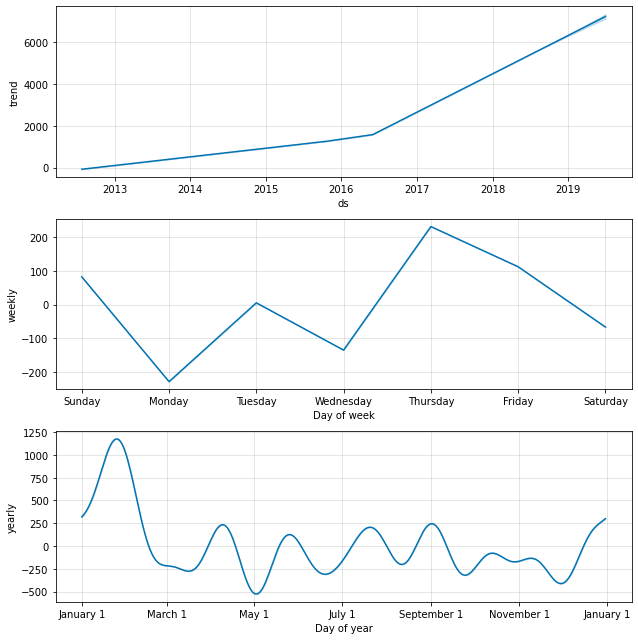

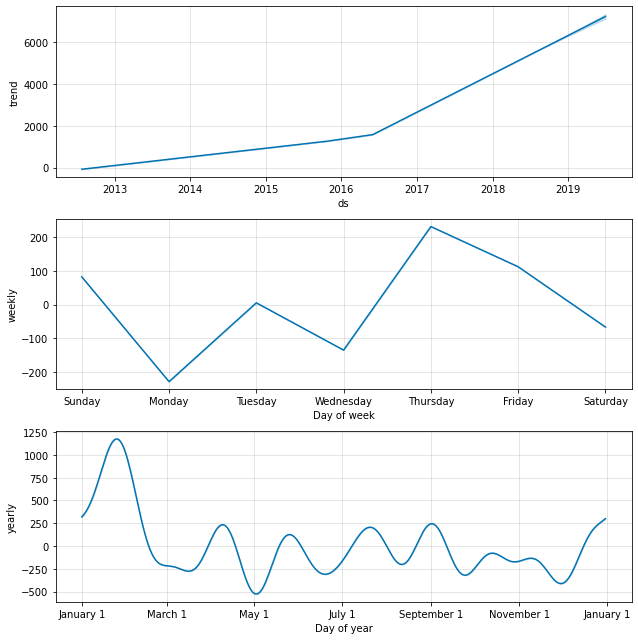

In [25]:
forecast = prp.predict(future)
print(forecast)
prp.plot_components(forecast)